In [46]:
import cv2 
import matplotlib.pyplot as plt

In [47]:
# Input image 
image = cv2.imread(r"./StockCake-Joyful Friends Gathered_1718551742.jpg") 
image = cv2.resize(image, (720, 640))

In [48]:
# Importing Models and set mean values 
face1 = "./weights/opencv_face_detector.pbtxt"
face2 = "./weights/opencv_face_detector_uint8.pb"
gen1 = "./weights/gender_deploy.prototxt"
gen2 = "./weights/gender_net.caffemodel"

In [49]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746) 

# Using models 
# Face 
face = cv2.dnn.readNet(face2, face1) 

# gender 
gen = cv2.dnn.readNet(gen2, gen1) 

# Categories of distribution 
lg = ['Male', 'Female'] 

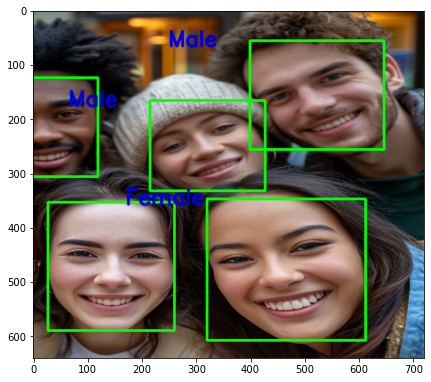

In [50]:
# Copy image 
fr_cv = image.copy()

# Face detection 
fr_h = fr_cv.shape[0] 
fr_w = fr_cv.shape[1] 
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300), 
                             [104, 117, 123], True, False) 
  
face.setInput(blob) 
detections = face.forward()

# Face bounding box creation 
faceBoxes = [] 
for i in range(detections.shape[2]): 
    #Bounding box creation if confidence > 0.7
    confidence = detections[0, 0, i, 2] 
    if confidence > 0.7: 
        x1 = int(detections[0, 0, i, 3]*fr_w)
        y1 = int(detections[0, 0, i, 4]*fr_h)
        x2 = int(detections[0, 0, i, 5]*fr_w)
        y2 = int(detections[0, 0, i, 6]*fr_h)
        
        faceBoxes.append([x1, y1, x2, y2])
        
        cv2.rectangle(fr_cv, (x1, y1), (x2, y2),(0, 255, 0), int(round(fr_h/150)), 8) 

# faceBoxes
# Checking if face detected or not 
if not faceBoxes:
    print("No face detected") 

# Final results (otherwise) 
# Loop for all the faces detected 
for faceBox in faceBoxes:
    #Extracting face as per the faceBox 
    face = fr_cv[max(0, faceBox[1]-15):
                 min(faceBox[3]+15, fr_cv.shape[0]-1),
                 max(0, faceBox[0]-15):min(faceBox[2]+15,
                                           fr_cv.shape[1]-1)]
    #Extracting the main blob part
    blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    #Prediction of gender
    gen.setInput(blob)
    genderPreds = gen.forward()
    gender = lg[genderPreds[0].argmax()] 
    #Putting text of age and gender
    #At the top of box
    cv2.putText(fr_cv,
                f'{gender}',
                (faceBox[0]-150, faceBox[1]+10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.3,
                (217, 0, 0),
                4,
                cv2.LINE_AA) 

plt.figure(figsize=(7, 7)) 
# RGB_img = cv2.cvtColor(fr_cv, cv2.COLOR_BGR2RGB)
plt.imshow(fr_cv[:, :, ::-1])